In [6]:
# Cell 1
from src.data_ingestion.static_data_loader import StaticDataLoader
import matplotlib.pyplot as plt
loader = StaticDataLoader()
regimes = loader.load_market_regimes()

regimes.head(10)

✅ Loaded 1453 days of market regime data
   Date range: 2020-01-02 to 2025-10-13


,date,sp500_close,vix_close,drawdown,bull_bear_regime,vix_regime,market_regime
0,2020-01-02,3257.850098,12.47,0.000000,Bull,Low_Volatility,Bull_Low_Vol
1,2020-01-03,3234.850098,14.02,-0.705987,Bull,Low_Volatility,Bull_Low_Vol
2,2020-01-06,3246.280029,13.85,-0.355144,Bull,Low_Volatility,Bull_Low_Vol
3,2020-01-07,3237.179932,13.79,-0.634473,Bull,Low_Volatility,Bull_Low_Vol
4,2020-01-08,3253.050049,13.45,-0.147338,Bull,Low_Volatility,Bull_Low_Vol
5,2020-01-09,3274.699951,12.54,0.000000,Bull,Low_Volatility,Bull_Low_Vol
6,2020-01-10,3265.350098,12.56,-0.285518,Bull,Low_Volatility,Bull_Low_Vol
7,2020-01-13,3288.129883,12.32,0.000000,Bull,Low_Volatility,Bull_Low_Vol
8,2020-01-14,3283.149902,12.39,-0.151453,Bull,Low_Volatility,Bull_Low_Vol
9,2020-01-15,3289.290039,12.42,0.000000,Bull,Low_Volatility,Bull_Low_Vol


In [7]:
# Cell 2 - Statistics
loader.get_regime_statistics()

,regime,days,percentage
0,Bull_Low_Vol,796,54.78
1,Bull_High_Vol,583,40.12
2,Bear_High_Vol,39,2.68
3,Bear_Medium_Vol,35,2.41


In [9]:
# Cell 3 - COVID Crash anschauen
covid_crash = loader.get_regime_for_date('2020-03-16')

import pandas as pd
pd.DataFrame([covid_crash])

,date,sp500_close,vix_close,drawdown,bull_bear_regime,vix_regime,market_regime
0,2020-03-16,2386.129883,82.690002,-29.532657,Bear,High_Volatility,Bear_High_Vol


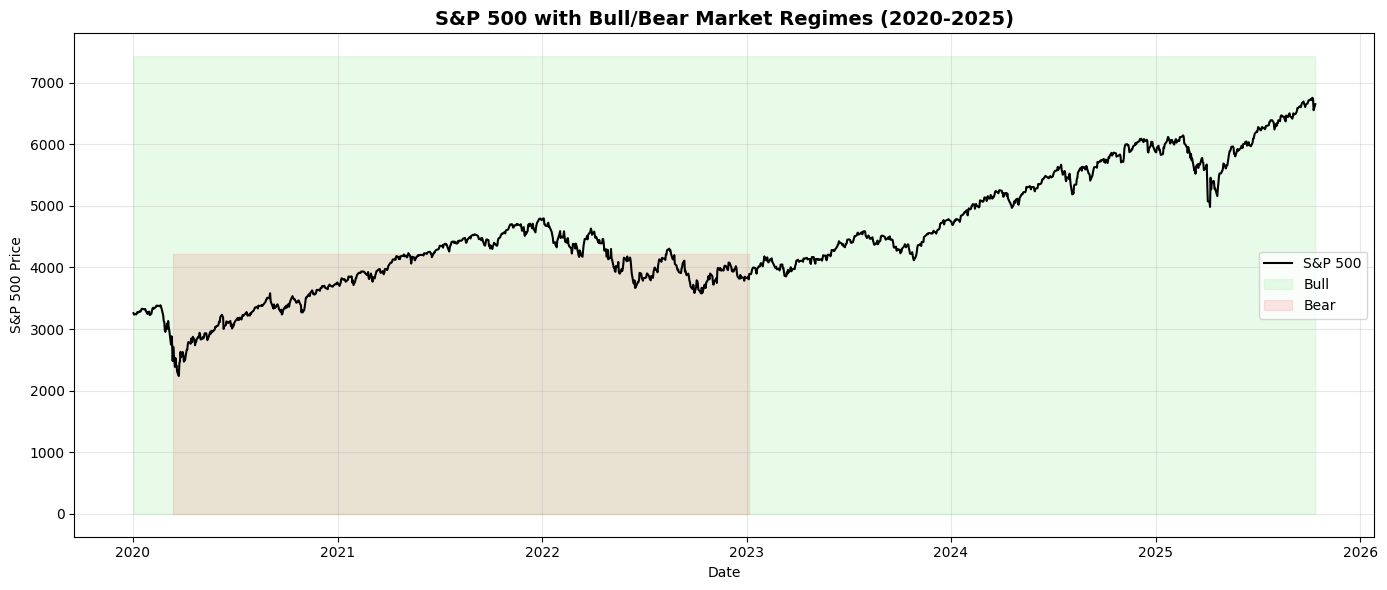

In [4]:
# Cell 4 - S&P 500 mit Regimes visualisieren
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 6))

# Plot S&P 500
ax.plot(regimes['date'], regimes['sp500_close'], color='black', linewidth=1.5, label='S&P 500')

# Färbe Hintergrund nach Regime
for regime in regimes['bull_bear_regime'].unique():
    regime_data = regimes[regimes['bull_bear_regime'] == regime]
    color = 'lightgreen' if regime == 'Bull' else 'lightcoral'
    ax.fill_between(regime_data['date'], 0, regime_data['sp500_close'].max() * 1.1,
                     alpha=0.2, color=color, label=regime if regime not in ax.get_legend_handles_labels()[1] else "")

ax.set_title('S&P 500 with Bull/Bear Market Regimes (2020-2025)', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('S&P 500 Price')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

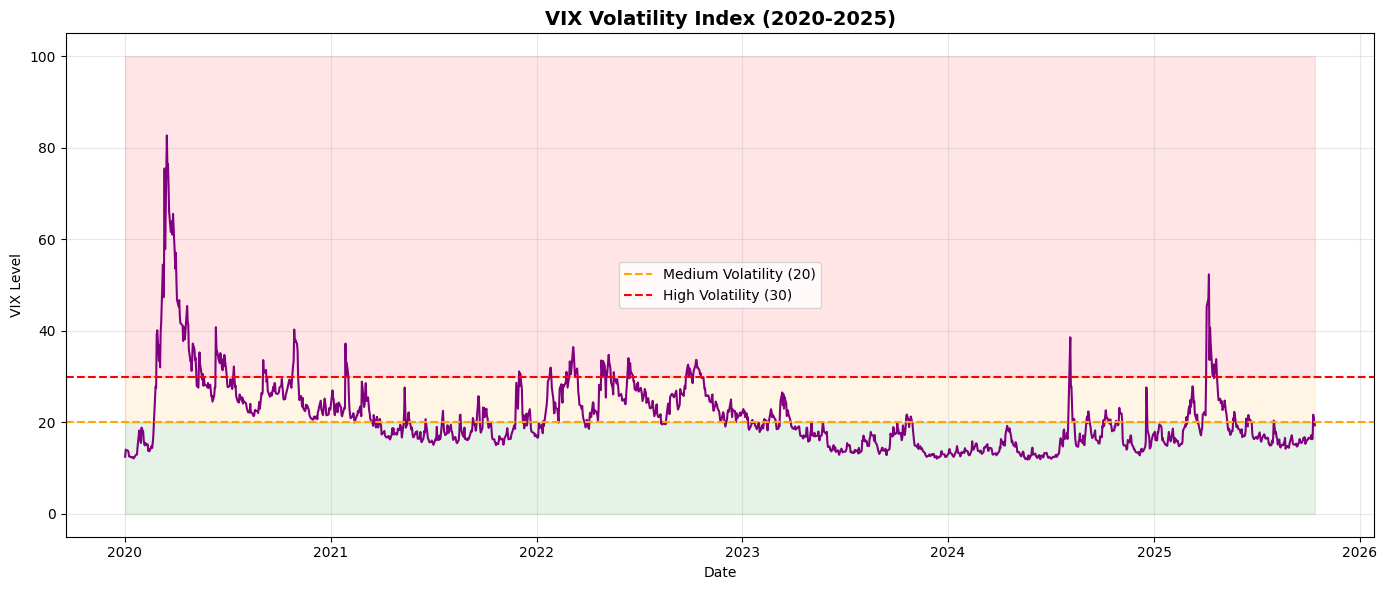

In [5]:
# Cell 5 - VIX Regimes
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(regimes['date'], regimes['vix_close'], color='purple', linewidth=1.5)
ax.axhline(y=20, color='orange', linestyle='--', label='Medium Volatility (20)')
ax.axhline(y=30, color='red', linestyle='--', label='High Volatility (30)')
ax.fill_between(regimes['date'], 0, 20, alpha=0.1, color='green')
ax.fill_between(regimes['date'], 20, 30, alpha=0.1, color='orange')
ax.fill_between(regimes['date'], 30, 100, alpha=0.1, color='red')

ax.set_title('VIX Volatility Index (2020-2025)', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('VIX Level')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()